# Divide and Conquer

Divide and conquer is a problem solving strategy that involves breaking the main problem into smaller sub-problems, solving the sub-problems, and combining these solutions into a solution of the main problem.

This is best illustrated via an example (inspired by a true story).

## Search

Suppose you work at a bank in the department for handing out cards. Each day you receive tens of new envelopes containing customers' cards, which you need to store safely until the custumers come to pick them up. This is a big bank, so at any given day, you may have hundreds of envelopes to keep. The account number of each client is printed on the envelope, and that is how you find someone's card when they come to collect it.

People are not known to be patient when they need to go to the bank, so you would like to find each person's card as fast as possible. How do you do that?

Certainly not by keeping all cards in a random order.

If the cards are sorted by the account number, it is much easier to find a certain card by the account. Can we devise a step-by-step algorithm to find the right envelope?

Suppose we are trying to find the card for account A. What do we know if we compare A with the envelope at the very middle?

- We can get lucky and this is the envelope with account A, in which case, we are done. (But most often than not, this won't happen)
- This envelope has an account number higher than A. That means that the envelope A must be in the lower half.
- This envelope has an account number lower than A. That means that envelope A must be in the upper half.

In the last two situations, we are left with the same problem again, namely: finding the envelope A in a sorted set of envelopes. Except that, this time, *the problem is smaller* because we have eliminated half of the envelopes we need to search through!

Since we have the same problem again, can we apply the same technique? Yes, we can. We can again take the envelope in the middle of the chosen half and compare with A, and then eliminate 1/4 of envelopes. This can be done until we either find envelope A, or we run out of envelopes in which case we can say for sure that there is no envelope A (assuming the sorting was done properly!).

What we did above is a classical divide-and-conquer algorithm for search called *binary search*. Abstracting away the details (account numbers, cards, bank, etc), the core problem we were trying to solve is finding whether an element is in a sorted list. Observe that it is crucial for the list to be sorted.

This is a simple case because we "divide" one problem (the full sequence of envelopes) into only one other smaller problem (half the sequence of envelopes). We will see other cases where this division results into many sub-problems.

The implementation of binary search in python is:

In [1]:
def binSearch(L, x):
    S = L
    while (len(S) > 0):
        m = len(S) // 2
        middle = S[m]
        if x == middle:
            return True
        elif x < middle:
            S = S[:m]
        elif x > middle:
            S = S[m+1:]
            
    return False

L = [4, 6, 8, 10, 15, 19, 23, 24, 34, 47, 57, 61, 78, 83, 89]
print("78?", binSearch(L,78))
print("15?", binSearch(L,15))
print("50?", binSearch(L,50))
            

78? True
15? True
50? False


## Sort

Another recurrent problem in computing is how to *sort* data. Binary search is an incredibly powerful technique, but for that to work, the data needs to be sorted. Turns out we can also apply divide-and-conquer for sorting.

Suppose you have a really long list to sort. This is hard, so let's split the list in half. If you have the two halves sorted, can you combine them into one big sorted list?

This operation is called *merge*, and we can implement it like this:

In [2]:
def merge(L1, L2):
    i1 = 0
    i2 = 0
    l1 = len(L1)
    l2 = len(L2)
    
    M = []
    for i in range(l1+l2):
        if i1 == l1:
            M += L2[i2:]
            break
        if i2 == l2:
            M += L1[i1:]
            break
            
        e1 = L1[i1]
        e2 = L2[i2]
        
        if e1 < e2:
            M += [e1]
            i1 += 1
        elif e1 > e2:
            M += [e2]
            i2 += 1
        else:
            M += [e1, e2]
            i1 += 1
            i2 += 1
        
    return M

merge([1,3,5],[2,4])

[1, 2, 3, 4, 5]

So the quetion now is, how do we sort the two halves? Note that this is the same problem again, but smaller! So we can use the same technique: split the halves in halves, sort, and merge. This will keep going until we can no longer split the list, i.e. when it contains zero or one element. In that case, the list is already sorted, trivially.

This is a classic sorting algorithm, called *merge sort*.

Let's try to implement it.

In [3]:
def mergesort(L):
    # M is a list of lists. First we split L until reaching
    # single elements, and then we start merging.
    M = []
    for e in L:
        M += [[e]]
        
    while len(M) > 1:
        l = len(M)
        newM = []
        for i in range(0,l,2):
            if i == l-1:
                newM += [M[i]]
            else:
                L1 = M[i]
                L2 = M[i+1]
                LM = merge(L1,L2)
                newM += [LM]
        M = newM
        
    return M[0]

mergesort([2,4,3])
            

[2, 3, 4]

The code above works, more or less, like merge sort. But it does not really convey the idea of having a sub-problem that we solve the same way. A much better way to implement this, closer to the concept, is via *recursion*.

## Recursion

We call something recursive when it is defined in terms of itself. This may sound very redundant, but we have just used recursion to solve the problems of searching and sorting, and all solutions kind of made sense (I hope!).

One way to think of recursion is: if we brake something apart, and end up with pieces that have the exact same property as the whole, than this thing is recursive. Another way to think about recursion is: if I use the same rules of construction for an object again and again, it is recursive.

In programming, recursion usually means a function that calls itself.

Let's think about our two solutions above in terms of recursion.

### Recursive search

When we were search for an element in a list, we compared it with the middle element, and then decided on which half we were supposed to continue the search. If we reach an empty list, the element is not there and we return `False`. That translates nicely into the code below. Note that there are no loops. Instead, once we decide where we need to search, we simply rely on the same function again to find the element. That is, we *call it recursively*.

In [4]:
def binSearchRec(L, x):
    if len(L) == 0:
        return False
    else:
        m = len(S) // 2
        middle = S[m]
        if x == middle:
            return True
        elif x < middle:
            found = binSearchRec(S[:m], x)
            return found
        elif x > middle:
            found = binSearchRec(S[m+1:], x)
            return found

L = [4, 6, 8, 10, 15, 19, 23, 24, 34, 47, 57, 61, 78, 83, 89]
print("78?", binSearch(L,78))
print("15?", binSearch(L,15))
print("50?", binSearch(L,50))

78? True
15? True
50? False


### Recursive sort

We can do the same exercise with merge sort. Our initial idea for a solution was: we split the list in half, sort it somehow, and merge. The "sort it somehow" part is when we make the recursive call to the same function.

Note that it is important to have a guard in the beginning, to return if we are at the smallest possible case. If we forget about this, the function will keep calling itself for eternity (or until your computer memory is over).

In [5]:
def mergesort(L):
    if len(L) <= 1:
        return L
    
    m = len(L) // 2
    left = L[:m]
    right = L[m:]
    
    sorted_left = mergesort(left)
    sorted_right = mergesort(right)
    
    return merge(sorted_left, sorted_right)
    
mergesort([4, 1, 2, 7, 3, 5, 9, 8, 6])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Fractals

Recursion also happens in nature, usually in the form of *fractals*. A fractal is a structure in which the same structure repeats inside itself.

Some examples include:

- The Romanesco broccoli:

<img src="broccoli.png" alt="Romanesco broccoli" width="200px" align="left"/>

- Nautilus shell:

<img src="nautilus.jpg" alt="Nautilus" width="200px" align="left"/>

- Fern leaves

<img src="fern.jpg" alt="Fern" width="400px" align="left"/>

- Ice crystals

<img src="ice-crystal.jpg" alt="Ice crystals" width="400px" align="left"/>

Since we know how to write programs recursively, *and* how to draw things in python, we can draw fractals! These are usually defined via a recursive mathematical function. You can find the code below for generating Koch Crystals, and Barsnley fern, famous examples of fractals. (Don't worry about understanding the code, just note that it is recursive.)

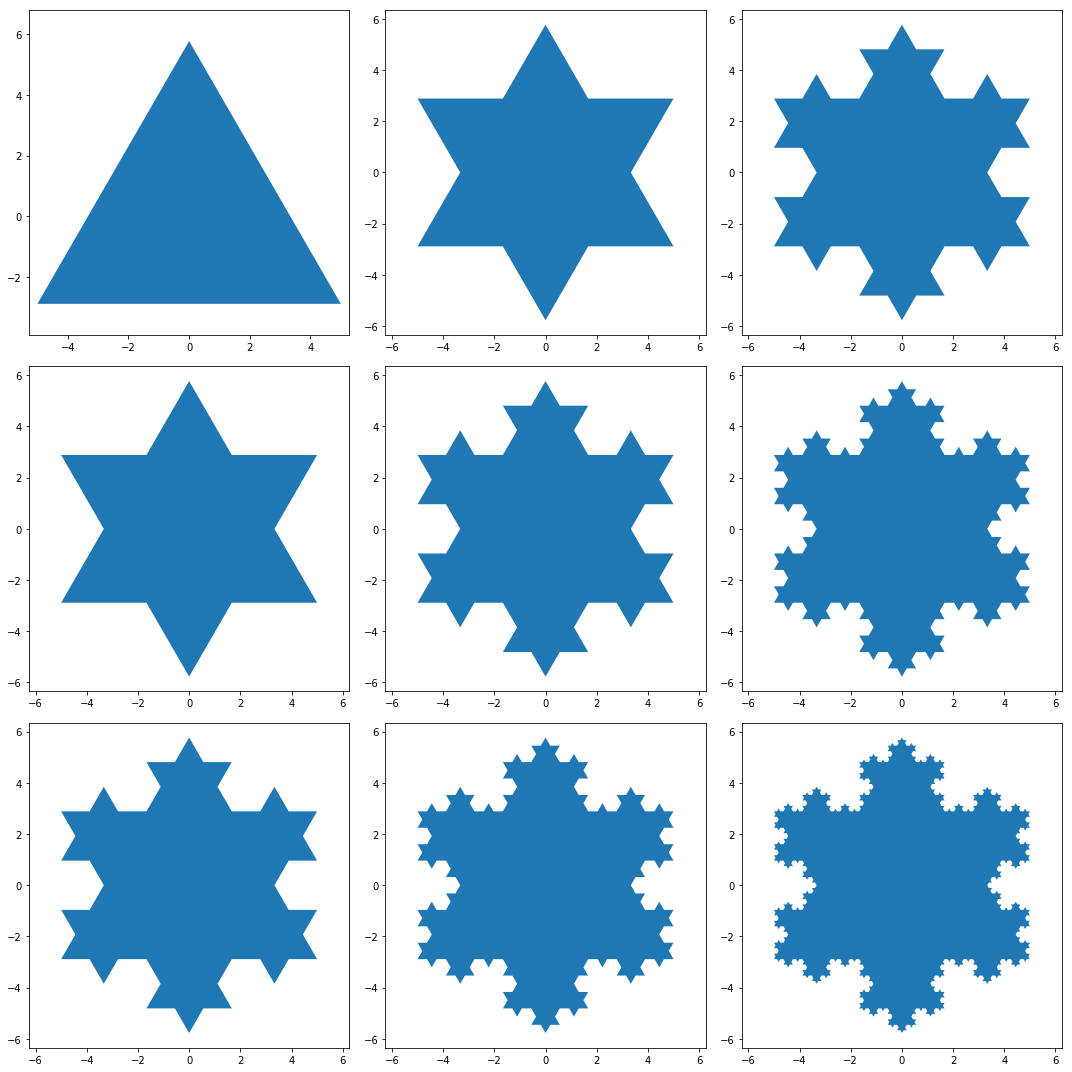

In [6]:
# Example taken from matplotlib gallery
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

fig, axs = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        x, y = koch_snowflake(order=i+j)
        axs[i,j].axis('equal')
        axs[i,j].fill(x, y)

fig.tight_layout()

plt.show()

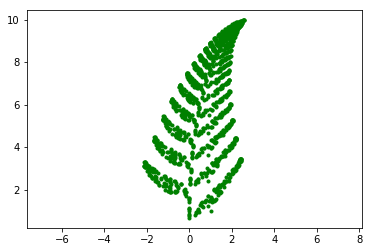

In [7]:
# Code based on: https://en.wikipedia.org/wiki/Barnsley_fern
import matplotlib.pyplot as plt
import random
 
# Recursion stack overflow because python does not have a decent
# treatment of recursion.
def fern(x, y, n):
    if n == 0:
        return ([],[])
    else:
        #r = randrange(0,5)
        xo = x
        yo = y
        r = random.random()  # to get probability
        r = r * 100
        if r < 1:
            x = 0
            y = 0.16 * y            
        elif r < 86:
            x = 0.85 * x + 0.04 * y
            y = -0.04 * x + 0.85 * y + 1.6
        elif r < 93:
            x = 0.20 * x - 0.26 * y
            y = 0.23 * x + 0.22 * y + 1.6
        else:
            x = -0.15 * x + 0.28 * y
            y = 0.26 * x + 0.24 * y + 0.44

        res = fern(x, y, n-1)
        return ([xo] + res[0], [yo] + res[1])

(xs, ys) = fern(1,1,1500)
plt.plot(xs, ys, "g.")
plt.axis('equal')
plt.show()

### Towers of Hanoi

The game *towers of Hanoi* consists on moving disks one at a time from one tower to another, using only one extra spare tower and never placing a bigger disk on top of a smaller one. We want to write a program for solving this problem for us. Before we do that, let’s spend more time looking at the problem and the solutions we can find for different number of disks. After playing with the towers for a while, we realize that the pattern is:

1. Move the upper disks to the spare tower
2. Move the biggest disk to the target tower
3. Move the disks on the spare tower to the target one

If we think of this in terms of divide and conquer, we see that first we need to move `n` disks from tower 1 to 3, with 2 spare. For that, we need to move `n-1` disks from tower 1 to 2, with 3 spare. For that we need to move `n-2` disks from tower 1 to 3, with 2 spare... And so on and so forth.

Naturally, we can devise a recursive strategy:

Move `n` disks from `t1` to `t3` with `t2` auxiliar tower:
- If `n` is 1: just make the move
- Otherwise: 
    - move `n-1` disks from `t1` to `t2` with `t3` auxiliar tower
    - move last dist from `t1` to `t3`
    - move `n-1` disks from `t2` to `t3` with `t1` auxiliar tower
    
Translating this solution into code:

In [8]:
# t1: origin tower
# t2: spare tower
# t3: target tower
# returns the number of steps it takes
def hanoi(n, t1, t2, t3):
    if n == 1:
        print("Move disk from", t1, "to", t3)
        return 1
    else:
        s1 = hanoi(n-1, t1, t3, t2)
        print("Move disk from", t1, "to", t3)
        s2 = hanoi(n-1, t2, t3, t1)
        return s1 + s2 + 1
    
hanoi(3, "T1", "T2", "T3")

Move disk from T1 to T3
Move disk from T1 to T2
Move disk from T3 to T1
Move disk from T1 to T3
Move disk from T2 to T3
Move disk from T2 to T1
Move disk from T3 to T2


7